In [10]:
import importlib
import problems
import matplotlib.pyplot as plt
importlib.reload(problems)


<module 'problems' from '/home/workspace/problems.py'>

In [6]:
results = problems.resnet_18_timeloop_loop()

0 l1_conv1 1
  Running config: base
[INFO] 2025-04-16 04:42:51,437 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18189443.42 7552892928
  Running config: dp
[INFO] 2025-04-16 04:43:05,615 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18188567.28 7552892928
  Running config: tp
[INFO] 2025-04-16 04:43:22,083 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


17688162.8 7552892928
1 l2_conv2_stride2 1
  Running config: base
[INFO] 2025-04-16 04:43:36,426 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18068168.51 7398752256
  Running config: dp
[INFO] 2025-04-16 04:43:50,850 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18064735.49 7398752256
  Running config: tp
[INFO] 2025-04-16 04:44:05,076 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


17382167.66 7398752256
2 l3-l7_conv2_stride1 5
  Running config: base
[INFO] 2025-04-16 04:44:19,680 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18068168.51 7398752256
  Running config: dp
[INFO] 2025-04-16 04:44:33,843 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18064735.49 7398752256
  Running config: tp
[INFO] 2025-04-16 04:44:48,108 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


17382167.66 7398752256
3 l8_conv3_stride2 1
  Running config: base
[INFO] 2025-04-16 04:45:02,391 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


10162371.42 3699376128
  Running config: dp
[INFO] 2025-04-16 04:45:16,893 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


10155505.39 3699376128
  Running config: tp
[INFO] 2025-04-16 04:45:31,304 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


8837272.28 3699376128
4 l9-l15_conv3_stride1 7
  Running config: base
[INFO] 2025-04-16 04:45:45,574 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18139092.05 7398752256
  Running config: dp
[INFO] 2025-04-16 04:45:59,900 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18125359.99 7398752256
  Running config: tp
[INFO] 2025-04-16 04:46:13,992 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


17404965.1 7398752256
5 l16_conv4_stride2 1
  Running config: base
[INFO] 2025-04-16 04:46:28,339 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


10241601.37 3699376128
  Running config: dp
[INFO] 2025-04-16 04:46:42,604 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


10214137.25 3699376128
  Running config: tp
[INFO] 2025-04-16 04:46:56,897 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


8869599.67 3699376128
6 l17-l27_conv4_stride1 11
  Running config: base
[INFO] 2025-04-16 04:47:10,922 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18303869.46 7398752256
  Running config: dp
[INFO] 2025-04-16 04:47:25,305 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18248941.22 7398752256
  Running config: tp
[INFO] 2025-04-16 04:47:39,399 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


17468596.13 7398752256
7 l28_conv5_stride2 1
  Running config: base
[INFO] 2025-04-16 04:47:53,857 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


10446858.21 3699376128
  Running config: dp
[INFO] 2025-04-16 04:48:07,990 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


10337001.74 3699376128
  Running config: tp
[INFO] 2025-04-16 04:48:24,902 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


8978604.32 3699376128
8 l29-l33_conv5_stride1 5
  Running config: base
[INFO] 2025-04-16 04:48:40,724 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18746906.98 7398752256
  Running config: dp
[INFO] 2025-04-16 04:48:55,701 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


18527194.04 7398752256
  Running config: tp
[INFO] 2025-04-16 04:49:11,111 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


17689764.18 7398752256
BASE RESULTS:
Energy: [18189443.42, 18068168.51, 18068168.51, 10162371.42, 18139092.05, 10241601.37, 18303869.46, 10446858.21, 18746906.98]
Cycles: [7552892928, 7398752256, 7398752256, 3699376128, 7398752256, 3699376128, 7398752256, 3699376128, 7398752256]
DP RESULTS:
Energy: [18188567.28, 18064735.49, 18064735.49, 10155505.39, 18125359.99, 10214137.25, 18248941.22, 10337001.74, 18527194.04]
Cycles: [7552892928, 7398752256, 7398752256, 3699376128, 7398752256, 3699376128, 7398752256, 3699376128, 7398752256]
TP RESULTS:
Energy: [17688162.8, 17382167.66, 17382167.66, 8837272.28, 17404965.1, 8869599.67, 17468596.13, 8978604.32, 17689764.18]
Cycles: [7552892928, 7398752256, 7398752256, 3699376128, 7398752256, 3699376128, 7398752256, 3699376128, 7398752256]


In [11]:
def plot_total_cycles(results):
    # Compute total cycles per config
    total_cycles = {config: sum(data["cycles"]) for config, data in results.items()}
    
    # Extract configs and values
    configs = list(total_cycles.keys())
    cycles = list(total_cycles.values())

    # Plotting
    plt.figure(figsize=(6, 4))
    plt.bar(configs, cycles, color=["gray", "skyblue", "orange"])
    plt.title("Total Cycles by Configuration")
    plt.xlabel("Configuration")
    plt.ylabel("Total Cycles")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

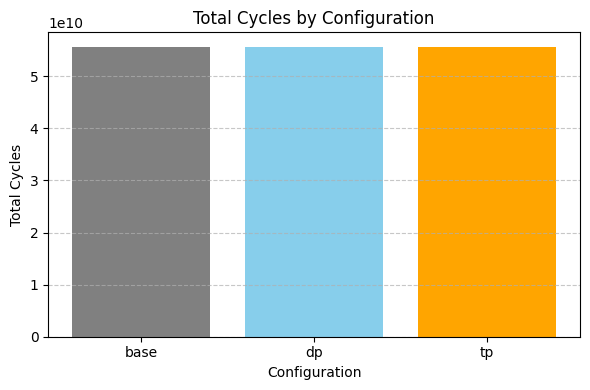

In [12]:
plot_total_cycles(results)

In [13]:
def plot_total_energy(results):
    # Compute total energy per config
    total_energy = {config: sum(data["energy"]) for config, data in results.items()}
    
    # Extract configs and values
    configs = list(total_energy.keys())
    energy = list(total_energy.values())

    # Plotting
    plt.figure(figsize=(6, 4))
    plt.bar(configs, energy, color=["green", "cornflowerblue", "salmon"])
    plt.title("Total Energy by Configuration")
    plt.xlabel("Configuration")
    plt.ylabel("Total Energy")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

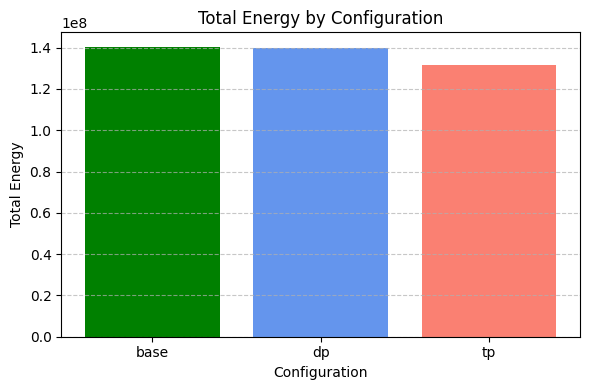

In [14]:
plot_total_energy(results)